# Import libraries and setup

In [1]:
# Import libraries we may need
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import yaml
import wget
import astir
import dill
import umap
reducer = umap.UMAP()
import statsmodels as sm
import anndata as ad

#Packages to do Elbow analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#To display multiple dataframes in same output
from IPython.display import display

#Loading bar functionality for long tasks
from tqdm import tqdm

#For multiprocessing
from functools import partial
from multiprocessing import Pool

#My module for importing IMC data into AnnData format
import mikeimc as mimc
import mikeimc_v2 as mikeimc_v2

#import imc_import
#import utils
#import pop_id


/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squ

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(64,64) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

# Save / restore environemnt
Use these functions to either save or load the environmental variables, otherwise you will lose all the objects between opening/closing Jupyter sessions!

In [ ]:
#load the session
dill.load_session('DC_ASTIR_Pf_spleen_Malawi.db')

In [ ]:
#save the session
dill.dump_session('DC_ASTIR_Pf_spleen_Malawi.db')

# Load/save anndata object

Save adata object
This will save the adata object in the current directory as a file called 'adata'

Load adata
This will open up a stored adata object (from the 'raw' directory)

In [ ]:
# Load the Malawi cohort - only covid cases
adata_Malawi = ad.read_h5ad('./2_h5ad files/adata_COVID') #all cases included

In [ ]:
adata_Malawi.obs['Group']

In [ ]:
# Load the Brazilian cohort - only covid cases
adata_Brazil = ad.read_h5ad('./8_h5ad_files_Brazil_cohort/adata_subset4.h5ad') #control case removed

In [ ]:
adata_Brazil.obs['Type']

In [ ]:
# Load the US cohort - only covid cases
adata_US = ad.read_h5ad('./7_h5ad_files_US_cohort/adata_covid') #control cases included

In [ ]:
adata_US.obs['ROI']

In [ ]:
#Add the cohort info as a column in .obs

adata_Malawi.obs["Cohort"] = "Malawi"
adata_Brazil.obs["Cohort"] = "Brazil"
adata_US.obs["Cohort"] = "US"


# Concatenate adatas

https://anndata.readthedocs.io/en/latest/concatenation.html

When the variables present in the objects to be concatenated aren’t exactly the same, you can choose to take either the intersection or union of these variables. This is otherwise called taking the "inner" (intersection) or "outer" (union) join.

In [ ]:
adata_list = adata_Malawi, adata_Brazil, adata_US

In [ ]:
adata_list

In [ ]:
#Try both methods
adata = ad.concat(adata_list, join="inner")
#adata2 = ad.concat(adata_list, join="outer")

In [ ]:
adata.obs

In [ ]:
# Save adatas
adata.write('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid')
#adata2.write('./2_h5ad files/adata_Malawi_Brazil_US_outer_concatenated')

In [ ]:
adata = ad.read_h5ad('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid') #all cases included
#adata2 = ad.read_h5ad('./2_h5ad files/adata_Malawi_Brazil_US_outer_concatenated') #all cases included


In [ ]:
adata.obs

In [ ]:
adata_scvi.write('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid_scvi')


In [3]:
adata_immune = ad.read_h5ad('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid_immune') 
adata_stromal = ad.read_h5ad('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid_stromal') 

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata_immune.write('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid_immune')
adata_stromal.write('./2_h5ad files/adata_Malawi_Brazil_US_inner_integrated_covid_stromal')

In [4]:
adata_immune

AnnData object with n_obs × n_vars = 150251 × 17
    obs: 'Master_Index', 'ROI', 'X_loc', 'Y_loc', 'cell_type', 'hierarchy', 'pheno_cluster', 'Cohort', 'pheno_cluster_edited2'
    uns: 'Cohort_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Integration

Harmony

In [ ]:
#Calculate PCA for adata - this must be done first (adata2 already contains X_pca)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
adata

In [ ]:
sc.pl.umap(adata, size =1, color="Cohort", save = "unintegrated_inner_dataset.pdf")

In [ ]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata, 'Cohort')

In [ ]:
#Calculate UMAP based on harmony integration
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)

In [ ]:
adata

Plot UMAPs
You can add extra .obs to UMAP_groups to colour the UMAPs by, e.g. treatment

In [ ]:
# Plot UMAP
sc.pl.umap(adata, s = 1, color="Cohort", ncols=1, size=3, save='_harmony_inner_dataset.pdf')

In [ ]:
# Harmonise some labels first - mainly the SARSCov2+ populations

#Re-annotation of the clusters in a dictionary file

covid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_pheno_cluster_edited_dict2.csv')
ep = covid_dict.set_index('pheno_cluster2').to_dict()

adata.obs['pheno_cluster_edited2']=adata.obs['pheno_cluster'].map(ep['Cell_Class2'])

adata.obs['pheno_cluster_edited2']=adata.obs['pheno_cluster_edited2'].astype('category')


In [ ]:
adata

Visualizing distributions across batches

Often, batches correspond to experiments that one wants to compare. Scanpy offers to convenient visualization possibilities for this.

a density plot
a partial visualization of a subset of categories/groups in an emnbedding

In [ ]:
adata

In [ ]:
adata.obs_names_make_unique

In [ ]:
#Density plot - it can be calculated for different columns in adata.obs
sc.tl.embedding_density(adata, groupby='Cohort')

In [ ]:
sc.pl.embedding_density(adata, groupby='Cohort', save='_harmony_inner_dataset_density.pdf')

Variational autoencoder (VAE) based integration

References: https://www.sc-best-practices.org/cellular_structure/integration.html#variational-autoencoder-vae-based-integration
https://docs.scvi-tools.org/en/stable/tutorials/notebooks/api_overview.html

In [ ]:
#Use scvi-env environment for this part of the analysis
# Python packages
import scanpy as sc
import scvi
import scib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import anndata as ad

In [ ]:
adata_scvi = adata.copy()
#adata_scvi2 = adata2.copy()

In [ ]:
adata_scvi

In [ ]:
# Create layer counts
adata_scvi.layers["counts"]=adata_scvi.X.copy()
adata_scvi2.layers["counts"]=adata_scvi2.X.copy()

In [ ]:
adata_scvi

In [ ]:
# Define the expression matrix to use and what the batch key is.
batch_key='Cohort'

In [ ]:
# Data preparation
# this creates fields marked with scvi
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key=batch_key)
adata_scvi

#scvi.model.SCVI.setup_anndata(adata_scvi2, layer="counts", batch_key=batch_key)
#adata_scvi2

In [ ]:
# Building the model
# Construct the scVI model object
# The scvi-tools package contains various other models - here we will use the scANVI model
model_scvi = scvi.model.SCVI(adata_scvi)
model_scvi

In [ ]:
#model_scvi2 = scvi.model.SCVI(adata_scvi2)
#model_scvi2

In [ ]:
# We can also print a more detailed description of the model that shows us where things are stored in the associated AnnData object.

model_scvi.view_anndata_setup()

In [ ]:
#model_scvi2.view_anndata_setup()

In [ ]:
# Training the model
# The model will be trained for a given number of epochs, a training iteration where every cell is passed through the network. 
# By default scVI uses the following heuristic to set the number of epochs. 
# For datasets with fewer than 20,000 cells, 400 epochs will be used and as the number of cells grows above 20,000 the number of epochs is continuously reduced. 
# The reasoning behind this is that as the network sees more cells during each epoch it can learn the same amount of information as it would from more epochs with fewer cells.
max_epochs_scvi = np.min([round((20000 / adata_scvi.n_obs) * 400), 400])
max_epochs_scvi

In [ ]:
#max_epochs_scvi2 = np.min([round((20000 / adata_scvi2.n_obs) * 400), 400])
#max_epochs_scvi2

In [ ]:
# We now train the model for the selected number of epochs (this will take ~20-40 minutes depending on the computer you are using).
# Additionally to setting a target number of epochs, it is possible to also set early_stopping=True in the training function. This will let scVI decide to stop training early depending on the convergence of the model. 
# The exact conditions for stopping can be controlled by other parameters.
model_scvi.train(max_epochs=26)

In [ ]:
# Extract the embedding

# The main result we want to extract from the trained model is the latent representation for each cell. 
# This is a multi-dimensional embedding where the batch effects have been removed that can be used in a similar way to how we use PCA dimensions when analysing a single dataset. 
# We store this in obsm with the key X_scvi.

adata_scvi.obsm["X_scVI"] = model_scvi.get_latent_representation()

In [ ]:
# Calculate a batch-corrected UMAP

#We calculate a new UMAP embedding but instead of finding nearest neighbors in PCA space, 
# we start with the corrected representation from scVI.

sc.pp.neighbors(adata_scvi, use_rep="X_scVI")
sc.tl.umap(adata_scvi)
adata_scvi

In [ ]:
sc.pl.umap(adata_scvi, size =1, color=batch_key, save = "scVI_inner_dataset.pdf")

In [ ]:
sc.tl.embedding_density(adata_scvi, groupby='Patient')

In [ ]:
sc.pl.embedding_density(adata_scvi, groupby='Patient', save='_scVI_density.pdf')

VAE integration using cell labels

When performing integration with scVI we pretended that we didn’t already have any cell labels (although we showed them in plots). While this scenario is common there are some cases where we do know something about cell identity in advance. Most often this is when we want to combine one or more publicly available datasets with data from a new study. When we have labels for at least some of the cells we can use scANVI (single-cell ANnotation using Variational Inference) [Xu et al., 2021]. This is an extension of the scVI model that can incorporate cell identity label information as well as batch information. Because it has this extra information it can try to keep the differences between cell labels while removing batch effects. Benchmarking suggests that scANVI tends to better preserve biological signals compared to scVI but sometimes it is not as effective at removing batch effects [Luecken et al., 2021]. While we have labels for all cells here it is also possible to use scANVI in a semi-supervised manner where labels are only provided for some cells.

Label harmonization
If you are using scANVI to integrate multiple datasets for which you already have labels it is important to first perform label harmonization. This refers to a process of checking that labels are consistent across the datasets that are being integrated. For example, a cell may be annotated as a “T cell” in one dataset, but a cell of the same type could have been given the label “CD8+ T cell” in another dataset. How best to harmonize labels is an open question but often requires input from subject-matter experts.

In [ ]:
# VAE integration using cell labels
# I will test this approach using the leiden0.3 as the cell label key
label_key = "pheno_cluster"
model_scanvi = scvi.model.SCANVI.from_scvi_model(model_scvi, labels_key=label_key, unlabeled_category="unlabelled")
print(model_scanvi)
model_scanvi.view_anndata_setup()

In [ ]:
# Harmonise some labels first - mainly the SARSCov2+ populations

#Re-annotation of the clusters in a dictionary file

covid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_pheno_cluster_edited_dict.csv')
ep = covid_dict.set_index('pheno_cluster').to_dict()

adata_scvi.obs['pheno_cluster_edited']=adata_scvi.obs['pheno_cluster'].map(ep['Cell_Class'])

adata_scvi.obs['pheno_cluster_edited']=adata_scvi.obs['pheno_cluster_edited'].astype('category')


In [ ]:
adata_scvi.obs

In [ ]:
label_key = "pheno_cluster_edited2"
model_scanvi = scvi.model.SCANVI.from_scvi_model(model_scvi, labels_key=label_key, unlabeled_category="unlabelled")
print(model_scanvi)
model_scanvi.view_anndata_setup()

In [ ]:
max_epochs_scanvi = int(np.min([10, np.max([2, round(max_epochs_scvi / 3.0)])]))
model_scanvi.train(max_epochs=max_epochs_scanvi)

In [ ]:
# extract the new latent representation from the model and create a new UMAP embedding.
adata_scvi.obsm["X_scANVI"] = model_scanvi.get_latent_representation()
sc.pp.neighbors(adata_scvi, use_rep="X_scANVI")
sc.tl.umap(adata_scvi)

In [ ]:
sc.pl.umap(adata_scvi, color=[label_key], wspace=1)

In [ ]:
sc.pl.umap(adata_scvi, color=[batch_key], wspace=1, save = "sANcVI_inner_dataset.pdf")

In [ ]:
sc.pl.embedding_density(adata_scvi, groupby='Patient', save='_scANVI_density.pdf')

In [ ]:
adata_scvi

# Cell proportions across cohorts

In [5]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours_edited2.csv')
colour_palette = col_df.set_index('pheno_cluster_edited2').to_dict()
colour_palette['colour']

{'Activated endothelial cell': '#0070C0',
 'Alveolar macrophage': '#A381EF',
 'Apoptotic alveolar macrophage': '#8595e1',
 'Apoptotic epithelial cell': '#0fcfc0',
 'Apoptotic fibroblast': '#FF7DA8',
 'Apoptotic SMC': '#9cded6',
 'Apoptotic neutrophil': '#8dd593',
 'Neutrophil': '#11c638',
 'B cell': '#000000',
 'NK cell': '#d9d2e9',
 'CD4 T cell': '#ff46a1',
 'CD4 Treg cell': '#A64D79',
 'CD8 T cell': '#6fa8dc',
 'Dendritic cell': '#b5bbe3',
 'Classical monocyte': '#b86cb9',
 'SMC': '#FA8000',
 'Fibroblast': '#b86cb9',
 'Endothelial cell': '#e07b91',
 'Epithelial cell': '#f0b98d',
 'Interstitial macrophage': '#4a6fe3',
 'Mast cell': '#d33f6a',
 'Mesenchymal': '#ffe6f2',
 'RBC': '#f71f0f',
 'SARSCoV2+ epithelial cell': '#A53F02',
 'SARSCoV2+ AM': '#FFD966',
 'SARSCoV2+ NK cell': '#d9d2e9',
 'SARSCoV2+ IM': '#00B0F0',
 'SARSCoV2+ neutrophil': '#336600',
 'SARSCoV2+ monocyte': '#FF7DA8',
 'unlabelled': '#EBFFD5'}

In [ ]:
# Remove RBCs
adata = adata[~adata.obs['pheno_cluster_edited2'].isin(['RBC']),:].copy()

In [ ]:
adata_scvi = adata_scvi[~adata_scvi.obs['pheno_cluster_edited2'].isin(['RBC']),:].copy()

In [ ]:
adata_immune = adata[adata.obs['hierarchy'].isin(['Lymphoid', 'Myeloid']),:].copy()
adata_stromal = adata[adata.obs['hierarchy'].isin(['Stromal', 'Vascular']),:].copy()

In [ ]:
tmp = pd.crosstab(adata.obs['pheno_cluster_edited2'],adata.obs['Cohort'], margins=False, margins_name='Total', normalize='columns')

In [ ]:
tmp = pd.crosstab(adata_scvi.obs['pheno_cluster_edited2'],adata_scvi.obs['Cohort'], margins=False, margins_name='Total', normalize='columns')

In [6]:
tmp = pd.crosstab(adata_immune.obs['pheno_cluster_edited2'],adata_immune.obs['Cohort'], margins=False, margins_name='Total', normalize='columns')

In [7]:
tmp2 = tmp.reindex(['B cell', "CD4 T cell", "CD4 Treg cell", "CD8 T cell",
                    'Dendritic cell',  'Mast cell',
                     "SARSCoV2+ NK cell",  'NK cell',
                    'SARSCoV2+ neutrophil', "Apoptotic neutrophil", 'Neutrophil', 
                    'SARSCoV2+ monocyte', "Classical monocyte", 'SARSCoV2+ IM', 'Interstitial macrophage',
                    'SARSCoV2+ AM', 'Apoptotic alveolar macrophage', 'Alveolar macrophage'])

In [ ]:
tmp2 = tmp.reindex(['SARSCoV2+ epithelial cell', 'Apoptotic epithelial cell', 'Epithelial cell', 
                    'Activated endothelial cell', 'Endothelial cell', 'Fibroblast', 'Apoptotic fibroblast',
                    'SMC', 'Apoptotic SMC', "Mesenchymal"])


In [ ]:
tmp3 = tmp2.reindex(index=tmp2.index[::-1])

In [8]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [9]:
tmp4

pheno_cluster_edited2,B cell,CD4 T cell,CD4 Treg cell,CD8 T cell,Dendritic cell,Mast cell,SARSCoV2+ NK cell,NK cell,SARSCoV2+ neutrophil,Apoptotic neutrophil,Neutrophil,SARSCoV2+ monocyte,Classical monocyte,SARSCoV2+ IM,Interstitial macrophage,SARSCoV2+ AM,Apoptotic alveolar macrophage,Alveolar macrophage
Cohort,,,,,,,,,,,,,,,,,,
Brazil,0.000000,0.089765,0.000000,0.083716,0.000000,0.000000,0.000000,0.040208,0.000000,0.011379,0.189577,0.000000,0.051609,0.000000,0.319867,0.049049,0.000000,0.164830
Malawi,0.040732,0.040517,0.040302,0.125756,0.042174,0.000000,0.000000,0.030480,0.049817,0.000000,0.079438,0.000000,0.034409,0.020750,0.219743,0.068019,0.129194,0.078670
US,0.005981,0.098660,0.000000,0.100109,0.009774,0.024633,0.036225,0.037859,0.073402,0.000000,0.262810,0.084966,0.001065,0.024747,0.003026,0.037901,0.000000,0.198841


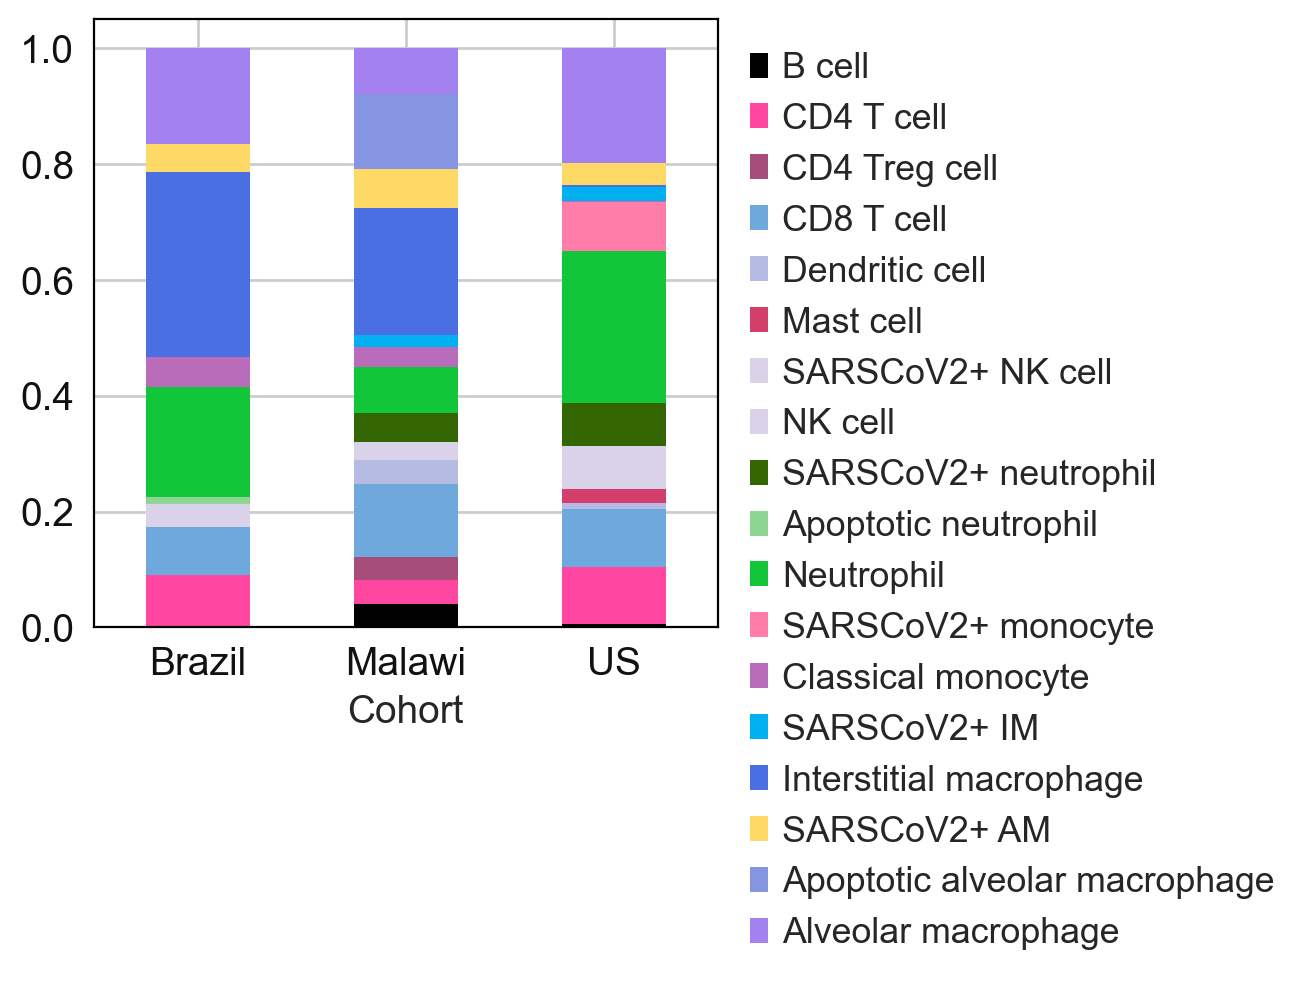

In [10]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

import seaborn as sb

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

#sb.set_style("whitegrid", {'axes.grid' : True})
tmp4.plot.bar(stacked=True, color=colour_palette['colour'], figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))
#plt.savefig("Frequency_celltypes_cohorts_stromal_reversed.pdf", format="pdf", bbox_inches="tight")

In [19]:
compression_opts = dict(method='zip',
                         archive_name='Cell_proportions_Cohort.csv') 
tmp2.to_csv('Myeloid1.zip', index=True, compression=compression_opts)

Raw data:


/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


pheno_cluster_edited2  Alveolar macrophage  Apoptotic alveolar macrophage  \
Cohort ROI                                                                  
Brazil C07_ROI1                   0.010471                            0.0   
       C07_ROI2                   0.011949                            0.0   
       C07_ROI3                   0.009280                            0.0   
       C07_ROI4                   0.004640                            0.0   
       C12_ROI1                   0.023159                            0.0   
...                                    ...                            ...   
US     C24_ROI7                   0.018684                            0.0   
       C24_ROI8                   0.008377                            0.0   
       C24_ROI9                   0.000903                            0.0   
       C24_ROI10                  0.003490                            0.0   
       C24_ROI11                  0.004558                            0.0   

pheno_cluster_edited2  Apoptotic neutrophil    B cell  CD4 T cell  \
Cohort ROI                                                          
Brazil C07_ROI1                    0.265799  0.000000    0.013270   
       C07_ROI2                    0.377323  0.000000    0.018946   
       C07_ROI3                    0.184015  0.000000    0.015109   
       C07_ROI4                    0.109665  0.000000    0.008474   
       C12_ROI1                    0.000000  0.000000    0.006555   
...                                     ...       ...         ...   
US     C24_ROI7                    0.000000  0.002288    0.008714   
       C24_ROI8                    0.000000  0.000572    0.004397   
       C24_ROI9                    0.000000  0.002288    0.001519   
       C24_ROI10                   0.000000  0.000572    0.008474   
       C24_ROI11                   0.000000  0.002288    0.004077   

pheno_cluster_edited2  CD4 Treg cell  CD8 T cell  Classical monocyte  \
Cohort ROI                                                             
Brazil C07_ROI1                  0.0    0.016223            0.004125   
       C07_ROI2                  0.0    0.019732            0.003025   
       C07_ROI3                  0.0    0.017216            0.006051   
       C07_ROI4                  0.0    0.012714            0.004675   
       C12_ROI1                  0.0    0.000530            0.018427   
...                              ...         ...                 ...   
US     C24_ROI7                  0.0    0.006291            0.000000   
       C24_ROI8                  0.0    0.005231            0.000275   
       C24_ROI9                  0.0    0.001192            0.000000   
       C24_ROI10                 0.0    0.007019            0.000000   
       C24_ROI11                 0.0    0.003841            0.001375   

pheno_cluster_edited2  Dendritic cell  Interstitial macrophage  Mast cell  \
Cohort ROI                                                                  
Brazil C07_ROI1              0.000000                 0.007335   0.000000   
       C07_ROI2              0.000000                 0.010936   0.000000   
       C07_ROI3              0.000000                 0.013025   0.000000   
       C07_ROI4              0.000000                 0.005201   0.000000   
       C12_ROI1              0.000000                 0.002489   0.000000   
...                               ...                      ...        ...   
US     C24_ROI7              0.004365                 0.000356   0.005190   
       C24_ROI8              0.009699                 0.000222   0.010957   
       C24_ROI9              0.004365                 0.000089   0.005190   
       C24_ROI10             0.003395                 0.000267   0.004037   
       C24_ROI11             0.005335                 0.000044   0.008651   

pheno_cluster_edited2   NK cell  Neutrophil  SARSCoV2+ AM  SARSCoV2+ IM  \
Cohort ROI                                                                
Brazil C07_

Statistics:


,Cell Type,T test,Mann-Whitney,T test Reject null?,T test Corrected Pval,Mann-Whitney Reject null?,Mann-Whitney Corrected Pval
0,Alveolar macrophage,1.088353e-12,1.990888e-09,True,1.850200e-11,True,1.990888e-08
1,Apoptotic alveolar macrophage,2.546511e-04,1.138322e-11,True,2.543595e-03,True,1.707482e-10
2,Apoptotic neutrophil,6.972226e-04,2.011352e-10,True,6.257531e-03,True,2.614757e-09
3,B cell,2.725412e-07,5.753277e-16,True,3.543030e-06,True,1.035590e-14
4,CD4 T cell,7.519443e-15,1.247440e-11,True,1.353500e-13,True,1.746417e-10
5,CD4 Treg cell,1.822628e-03,9.006762e-10,True,1.448835e-02,True,1.080811e-08
6,CD8 T cell,7.691818e-06,2.346615e-04,True,8.460675e-05,True,1.407143e-03
7,Classical monocyte,5.217910e-09,1.657722e-09,True,7.826865e-08,True,1.823494e-08
8,Dendritic cell,3.784240e-02,1.581564e-07,False,2.366504e-01,True,1.265250e-06
9,Interstitial macrophage,1.509632e-06,6.327065e-04,True,1.811544e-05,True,3.159532e-03


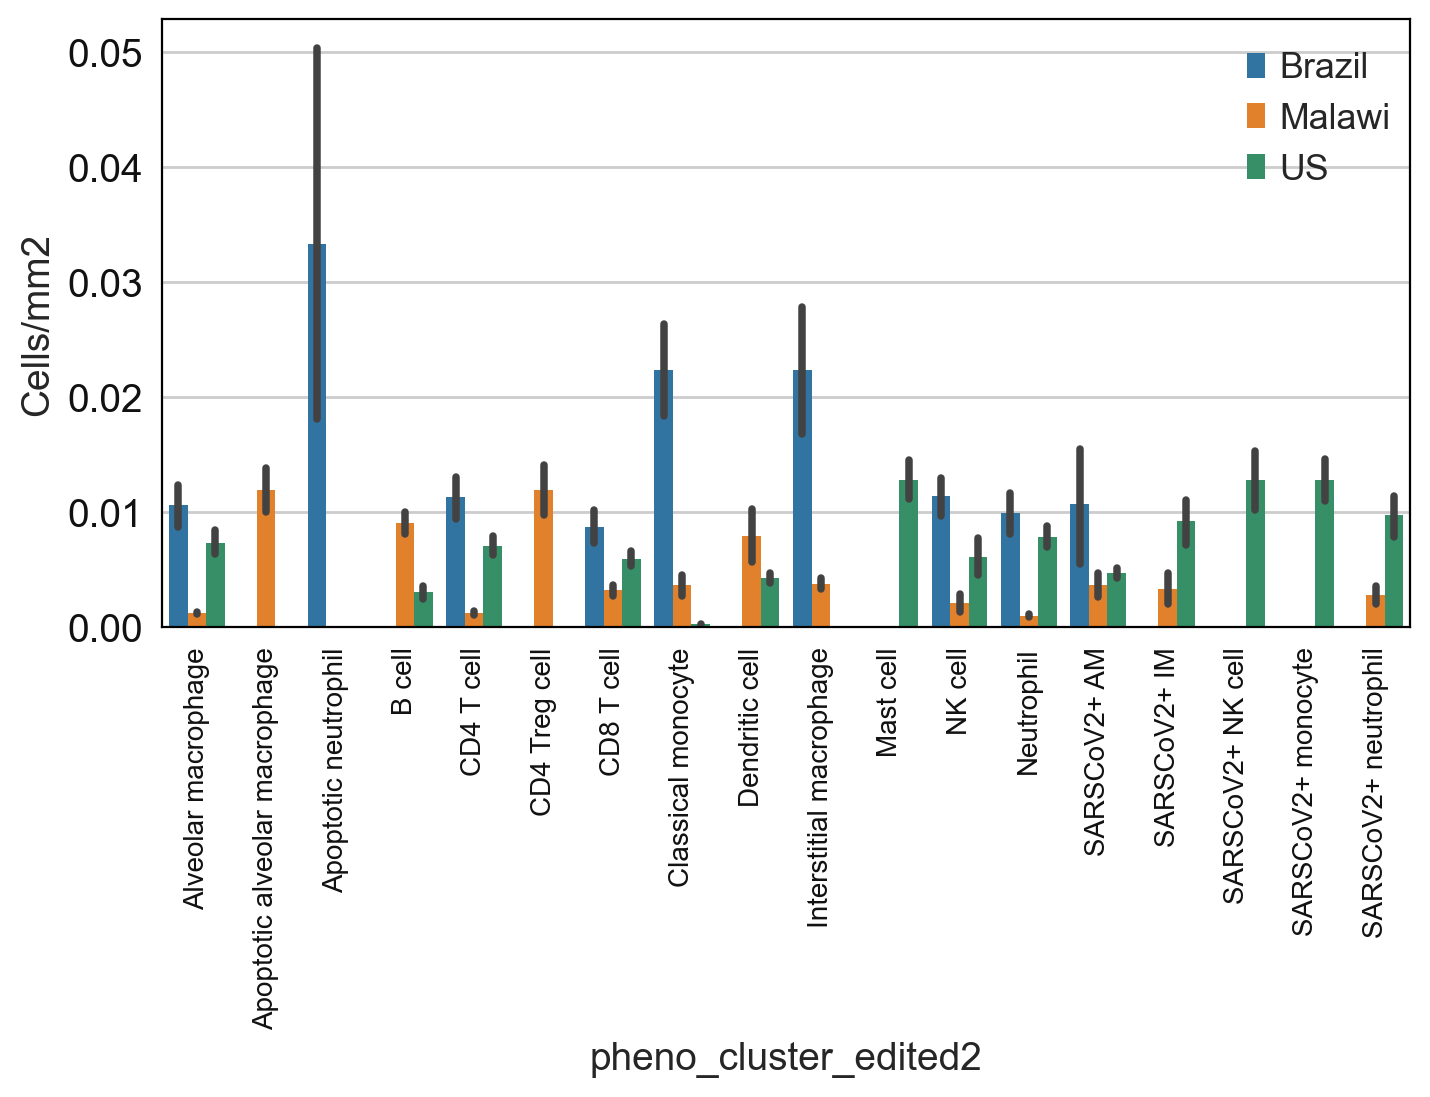

In [21]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Cohort']:

    mikeimc_v2.grouped_graph(adata_immune,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='pheno_cluster_edited2',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True, crosstab_norm='columns') #If you change display_tables to True, will also do stats on the groups
    # use crosstab_norm='columns' to plot and do statistics based on cell frequencies per group
    plt.show()

# Proportion comparisons analysis - scanpro

In [11]:
from scanpro import scanpro

In [18]:
adata_immune.obs['ROI']

2358       0305_1_A
2360       0305_1_A
2361       0305_1_A
2362       0305_1_A
2363       0305_1_A
            ...    
285065    C24_ROI11
285072    C24_ROI11
285074    C24_ROI11
285086    C24_ROI11
285088    C24_ROI11
Name: ROI, Length: 150251, dtype: category
Categories (185, object): ['0305_1_A', '0305_1_C', '0305_2_A', '0307_1_A', ..., 'C27_ROI4', 'C29_ROI2', 'C29_ROI3', 'C29_ROI4']

In [17]:
out = scanpro(adata_immune, clusters_col='pheno_cluster_edited2', conds_col='Cohort', samples_col='ROI')

[WARNING] Sample names are not unique across conditions! Changing sample names to <condition>_<sample>.
[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [13]:
out.results

,baseline_props,mean_props_Malawi,mean_props_Brazil,mean_props_US,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Alveolar macrophage,0.162082,0.115260,0.229970,0.196174,4.333413,1.435397e-02,1.519832e-02
Apoptotic alveolar macrophage,0.028013,0.097701,0.000000,0.000000,378.805894,1.110223e-16,1.816729e-16
Apoptotic neutrophil,0.003581,0.000000,0.014487,0.000000,24.689913,2.507863e-10,3.472425e-10
B cell,0.011634,0.064733,0.000000,0.006987,274.380326,1.110223e-16,1.816729e-16
CD4 T cell,0.083254,0.032237,0.085446,0.099253,38.448527,6.772360e-15,1.015854e-14
CD4 Treg cell,0.008739,0.033143,0.000000,0.000000,228.640400,1.110223e-16,1.816729e-16
CD8 T cell,0.100512,0.142481,0.085680,0.106514,3.084358,4.790373e-02,4.790373e-02
Classical monocyte,0.024200,0.037030,0.051113,0.001057,51.438718,1.110223e-16,1.816729e-16
Dendritic cell,0.013724,0.027943,0.000000,0.010367,94.141393,1.110223e-16,1.816729e-16


# QC integration methods

In [ ]:
import faiss
from scib_metrics.nearest_neighbors import NeighborsOutput

In [ ]:
from scib_metrics.benchmark import Benchmarker

In [ ]:
import time

In [ ]:
adata_scvi

In [ ]:
start = time.time()
bm = Benchmarker(
    adata_scvi,
    batch_key=batch_key,
    label_key=label_key,
    embedding_obsm_keys=["X_pca", "X_scVI", "X_scANVI", "X_pca_harmony"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=None,
    n_jobs=-1,
)
bm.benchmark()
end = time.time()
print(f"Time: {int((end - start) / 60)} min {int((end - start) % 60)} sec")

In [ ]:
label_key = "population"
batch_key='Patient'

In [ ]:
metrics_scvi = scib.metrics.metrics_fast(adata_scvi, batch_key, label_key, embed="X_scVI")
metrics_scanvi = scib.metrics.metrics_fast(adata_scvi, batch_key, label_key, embed="X_scANVI")
metrics_bbknn = scib.metrics.metrics_fast(adata_scvi, batch_key, label_key)# BBKNN is stored in the neighbours key, because I ran in adata_subset it might no be different between these adatas
metrics_harmony = scib.metrics.metrics_fast(adata_scvi, batch_key, label_key, embed="X_pca_harmony")


# Supervised cell type identification using Astir

This uses Astir (https://github.com/camlab-bioml/astir) to do 'semi-supervised' cell identification using a neural network. You specify the populations and markers in hte 'markers.yml' file - see the Astir documentation for full details

Import markers file and data file

In [ ]:
# Read in the YAML file with a list of the expected marker pairs
with open(r'markers.yml') as file:
  cell_types = yaml.load(file, Loader=yaml.FullLoader)

#View the contents of the YML file
!head markers.yml
print(cell_types['cell_types'])

In [ ]:
adata_subset3.write(filename='adata_subset_DC_astir')

import os
import warnings
from typing import Any

import anndata
import loompy
import matplotlib.cbook
import numpy as np
import pandas as pd
import torch
import yaml
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from astir.data import from_anndata_yaml
#the name of the anndata file below has to be as saved above!!

ast = from_anndata_yaml("adata_subset_DC_astir", "markers.yml", batch_name=None)
ast

Set training parameters

I've left these all as the default for now

In [ ]:
# Create batch size proportional to the number of cells
N = ast.get_type_dataset().get_exprs_df().shape[0]
batch_size = int(N/100)

# Number of training epochs
max_epochs = 1000

# Set learning rate
learning_rate = 2e-3

# Set initial epochs
initial_epochs = 3

In [ ]:
#Run the cell type identification
ast.fit_type(max_epochs = max_epochs,
             batch_size = batch_size,
             learning_rate = learning_rate,
             n_init_epochs = initial_epochs,
             delta_loss=0.001)

Number of cells of each type found

In [ ]:
ast.get_celltypes().value_counts()

In [ ]:
df = ast.diagnostics_celltype().head(n=20)
df

In [ ]:
#plot the losses to assess convergence
plt.figure(figsize=(5,4))
plt.plot(np.arange(len(ast.get_type_losses())), ast.get_type_losses())
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
#get cell type assignment probabilities
assignments = ast.get_celltype_probabilities()
assignments

In [ ]:
assignments.to_csv("../assignments_probabilities.csv")

In [ ]:
sb.heatmap(assignments, annot=False, xticklabels=1, yticklabels=False)

In [ ]:
ast.get_celltypes()

In [ ]:
ast.type_to_csv("../cell-types.csv")

Add hierarchy and cell type data to original Adata

In [ ]:
# Check that the hierarchy dictionary have been loaded correctly
ast.get_hierarchy_dict()

In [ ]:
#Retrieve the table of probabilites
hierarchy_table =  ast.assign_celltype_hierarchy(depth = 1)

cell_types = hierarchy_table.columns.tolist()

#This is  the threshold as above - probably best to keep the same!
threshold_for_classification = 0.5

#Start a new list that will store the hierarchy data
hierarchy = []

#This will work down each row and figure out which hierarchy type have the highest probability
for index, row in hierarchy_table.iterrows():
    row_values = row.values
    max_prob = np.max(row_values)
    
    if max_prob < threshold_for_classification:
        #If the cell doesn't fit into any category, return Unknown
        hierarchy.append('Other')
    else:
        #Add to the list the 
        hierarchy.append(cell_types[np.argmax(row_values)])

adata_subset.obs["cell_type_astir"] = ast.get_celltypes(threshold=threshold_for_classification)['cell_type']
adata_subset.obs["hierarchy_astir"] = hierarchy

In [ ]:
adata_subset

In [ ]:
#This code further filters the data by removing cells from C10, C31 ROIs and C21_ROI3
#The .copy() makes a completely seperate copy
adata_subset2 = adata_subset.copy()
adata_subset2 = adata_subset2[~adata_subset2.obs['cell_type_astir'].isin(['Other','Unknown']),:].copy()

In [ ]:
adata_subset2

In [ ]:
#Plot a heatmap grouped by hierarchy
sc.pl.heatmap(adata_subset2, adata_subset3.var_names, groupby='cell_type_astir', cmap='viridis', vmax=0.75, swap_axes=False, save='_cell_type.pdf')

In [ ]:
#Plot a heatmap grouped by cell types
sc.pl.heatmap(adata_subset2, adata_subset3.var_names, groupby='cell_type_astir', vmax=0.75, swap_axes=True) #save='_ASTIR_celltype.pdf')

In [ ]:
#Plot a heatmap grouped by ASTIR
sc.pl.matrixplot(adata_subset2, adata_subset3.var_names, groupby='cell_type_astir', swap_axes=False, cmap='viridis', save='_ASTIR_cell_type.png')

In [ ]:
sb.set_style("darkgrid", {'axes.grid' : False})

graph = sb.lmplot(data = adata_subset2.obs, x = 'X_loc',y='Y_loc',hue ='cell_type_astir',palette = 'bright',height = 8,col = 'ROI',col_wrap = 6,fit_reg = False, aspect=1)
graph.savefig("MappedPlots_cell_type_astir.pdf")

In [ ]:
sc.pp.neighbors(adata_subset2, use_rep='X_pca_harmony')
sc.tl.umap(adata_subset2)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_subset2, color=['cell_type_astir'], size=2, save='_redsea_cell_type_astir.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sb.set_style("white", {'axes.grid' : False})
sc.pl.umap(adata_subse2, color = "hierarchy_astir", s = 2, legend_loc='on data', title='', legend_fontsize = 7, size=2, save='_hierarchy_astir.pdf')

In [ ]:
adata_subset

In [ ]:
adata_subset2

# Abundance graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_subset2.obs['cell_type'], adata_subset2.obs['Group'], margins=False, normalize = "columns")

In [ ]:
tmp

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Celltype_Group.csv') 
tmp.to_csv('Celltype_Group.zip', index=True, compression=compression_opts)

In [ ]:
tmp2 = pd.DataFrame.transpose(tmp)

In [ ]:
tmp2

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

#colour_palette['colour']
tmp2.plot.bar(stacked=True, color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))
plt.savefig("cell_frequencies_group_after_astir.pdf", format="pdf", bbox_inches="tight")

Example breakdown of populations per case
Here, break down the myeloid and tumour populations per case

In [ ]:
#Example breakdown of populations per case
#Here, break down the myeloid and lymphoid populations per case

adata_m = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Myeloid'])].copy()
adata_l = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Lymphoid'])].copy()
adata_v = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Vascular'])].copy()

fig, axs = plt.subplots(1,3,figsize=(11, 6),constrained_layout=True)

tmp = pd.crosstab(adata_m.obs['Group'],adata_subset2.obs['cell_type'], normalize='index')
tmp.plot.bar(color=color_pal,ax=axs[0],stacked=True).legend(bbox_to_anchor=(0.75, -0.5))#.legend(bbox_to_anchor=(1.1, 1))

tmp = pd.crosstab(adata_l.obs['Group'],adata_subset2.obs['cell_type'], normalize='index')
tmp.plot.bar(color=color_pal,ax=axs[1],stacked=True).legend(bbox_to_anchor=(0.75, -0.5))#.legend(bbox_to_anchor=(1.1, 1))

tmp = pd.crosstab(adata_v.obs['Group'],adata_subset2.obs['cell_type'], normalize='index')
tmp.plot.bar(color=color_pal,ax=axs[2],stacked=True).legend(bbox_to_anchor=(0.75, -0.5))#.legend(bbox_to_anchor=(1.1, 1))

fig.savefig('population_breakdowns_Group.png')

Abundances graphs with stats
Example of case averaging abundance stats

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Patient']:

    mikeimc_v2.grouped_graph(adata_subset2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='cell_type',
                             fig_size=(20,8),
                             log_scale=False,
                            display_tables=False) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
mikeimc_v2.pop_stats(adata_subset2,
          groups='Group', #The adata.obs we want to use to compare between
          Case_id='Patient', #The adata.obs that defines case
          ROI_id='ROI',
          x_axis='cell_type',
          display_tables=True,
          fig_size=(8,3),
          save='pop_stats_Group.png',
           log_scale=False
         )

# Categorise samples using UMAP for cell abundance

This will use the abundance of the different populations to create a UMAP, then colour it by an adata.obs

In [ ]:
mikeimc_v2.cellabundance_UMAP(adata_subset2,
                              ROI_id='Patient',
                              population='cell_type',
                              colour_by='Group',
                              annotate=True,
                              save='abundance_umap.svg')

# Create new adatas for all cell types for unsupervised analyses

# Myeloid cells

In [ ]:
adata_myeloid = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Myeloid'])].copy()
sc.pl.heatmap(adata_myeloid, adata_myeloid.var_names, groupby='cell_type', vmax=0.75, cmap = 'viridis', swap_axes=True, save='_ASTIR_myeloid.png')

In [ ]:
#Plot clustered heatmap
sc.tl.dendrogram(adata_myeloid, groupby = 'cell_type')
sc.pl.heatmap(adata_myeloid, adata_myeloid.var_names, groupby='cell_type', vmax=0.75, swap_axes=True,dendrogram=True, save='_ASTIR_myeloid_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_myeloid_norm = adata_myeloid.copy()
sc.pp.scale(adata_myeloid_norm, max_value=2,  zero_center=True)
sc.pl.heatmap(adata_myeloid_norm, adata_myeloid_norm.var_names, groupby='cell_type', cmap='viridis', swap_axes=True, save='_scaled_ASTIR_myeloid.png')

# Lymphoid cells

In [ ]:
#Plot heatmap
adata_lymphoid = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Lymphoid'])].copy()
sc.pl.heatmap(adata_lymphoid, adata_lymphoid.var_names, groupby='cell_type', vmax=0.75, cmap='viridis',swap_axes=True, save='_ASTIR_lymphoid.png')

In [ ]:
#Plot scaled heatmap
adata_lymphoid_norm = adata_lymphoid.copy()
sc.pp.scale(adata_lymphoid_norm, max_value=1.5,  zero_center=True)
sc.pl.heatmap(adata_lymphoid_norm, adata_lymphoid_norm.var_names, groupby='cell_type', swap_axes=True, save='_scaled_ASTIR_lymphoid.pdf')

# Vascular and Stromal cells

In [ ]:
adata_vascular = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Vascular'])].copy()
sc.pl.heatmap(adata_vascular, adata_vascular.var_names, groupby='cell_type', vmax=0.75, cmap='viridis', swap_axes=True, save='_ASTIR_vascular.png')

adata_endothelium = adata_subset2[adata_subset2.obs['cell_type'].isin(['Endothelial cells'])].copy()
sc.pl.heatmap(adata_endothelium, adata_endothelium.var_names, groupby='cell_type', cmap='viridis', swap_axes=True, vmax=0.75, save='_ASTIR_endothelium.png')

adata_RBC = adata_subset2[adata_subset2.obs['cell_type'].isin(['RBCs'])].copy()
sc.pl.heatmap(adata_RBC, adata_RBC.var_names, groupby='cell_type', swap_axes=True, vmax=0.75, cmap='viridis', save='_ASTIR_RBC.png')

#Plot scaled heatmap
adata_vascular_norm = adata_vascular.copy()
sc.pp.scale(adata_vascular_norm, max_value=0.5,  zero_center=True)
sc.pl.heatmap(adata_vascular_norm, adata_vascular_norm.var_names, groupby='cell_type', cmap='viridis', swap_axes=True, save='_scaled_ASTIR_vascular.png')

In [ ]:
adata_stromal = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Stromal'])].copy()
sc.pl.heatmap(adata_stromal, adata_stromal.var_names, groupby='cell_type', cmap='viridis', swap_axes=True, vmax=0.75, save='_ASTIR_stromal.png')

# Unsupervised analyses on cellular types - ASTIR output

# ASTIR - clustering analysis including functional markers

In [ ]:
#including functional markers
myeloid_markers = ['CD45', 'CD11b', 'CD11c', 'CD14', 'CD16', 'CD68', 'CD163', 'CD206','Iba1', 'CD33', 'VISTA', 'CD74', 'HLADR',
                   'CX3CR1', 'Vimentin', 'VEGF', 'PDL1','Ki67', 'MCT4']
adata_myeloid_2 = adata_myeloid[:,myeloid_markers].copy()

lymphoid_markers = ['CD3','CD4','CD8', 'CD19', 'CD20', 'CD138', 'CD56', 'CD45RA', 'CD45RO', 'CD27', 'IgD', 'HLADR',
                    'CD38', 'CD74','PD1','PDL1','Foxp3', 'VISTA', 'LAG3','Foxp3', 'TIM-3', 'CX3CR1', 'Vimentin', 'Ki67', 'MCT4']
adata_lymphoid_2 = adata_lymphoid[:,lymphoid_markers].copy()

vascular_markers = ['CD31','CD105', 'SMA', 'CD235ab', 'VEGF', 'CD74','HLADR','PDL1', 'Ki67','Fibronectin','MCT4']
adata_vascular_2 = adata_vascular[:,vascular_markers].copy()

In [ ]:
adata_vascular_2.var_names_make_unique

# First leiden clustering - identification of major cell types

This is the same algorithm used by PhenoGraph, and is more or less the same

Initial Leiden clustering
resolution - Change this to alter the size of the clusters - small resolution results in bigger clusters (therefore, less clusters overall, but each with more cells).
Feel free to re-run this with several different resolutions, to see which looks best!

In [ ]:
# Change this to alter the size of the clusters - small resolution results in bigger clusters (therefore, less clusters overall, but each with more cells)
resolution = 0.3
leiden_obs_name = 'leiden_'+str(resolution)

# This will perform the clustering, then add an 'obs' with name specified above, e.g leiden_0.3
sc.tl.leiden(adata_subset, resolution=resolution, key_added = leiden_obs_name)

In [ ]:
adata_subset

In [ ]:
obs_to_show = adata_subset.obs.columns.tolist()[-1] #This is the last .obs to be added, alternatively put actual name of leiden group

In [ ]:
import pop_id
pop_id.population_summary(adata_subset, categorical_obs='Group', groupby_obs=obs_to_show) 

# Labelling populations

In [ ]:
pop_id.create_remapping(adata_subset, 'leiden_0.3')

# Edit in Excel

The remapping file is created in this directory, fill in the table in Excel for how each of the population should be remapped.

By default three new populations are added (population, population_broad, hierarchy), but you can call the whatever you like and add more column/new groups if you wish

Read in labelling file and remap

In [ ]:
#pop_id.read_remapping(adata_subset, 'leiden_0.3')

In [ ]:
leiden_obs_name = 'leiden_0.3' #This will depend on what subclustering you did

populations={'0':'RBCs',
'1':'Myeloid',
'2':'B cell',
'3':'Myeloid',
'4':'T cell',
'5':'Stroma',
'6':'B cell',
'7':'NK cell'
}

hierarchy={'0':'Erythroid',
'1':'Myeloid',
'2':'Lymphoid',
'3':'Myeloid',
'4':'Lymphoid',
'5':'Stroma',
'6':'Lymphoid',
'7':'Lymphoid'} 
    
adata_subset.obs['population']=adata_subset.obs[leiden_obs_name].map(populations).astype('category')
#adata_subset.obs['population_broad']=adata_subset.obs[leiden_obs_name].map(populations_broad).astype('category')
adata_subset.obs['hierarchy']=adata_subset.obs[leiden_obs_name].map(hierarchy).astype('category')

In [ ]:
adata_subset

In [ ]:
pop_id.population_summary(adata_subset, categorical_obs='Group', groupby_obs="population") 
#plt.savefig("data.pdf", format="pdf", bbox_inches="tight")

Plot initial clustering results

In [ ]:
#sc.set_figure_params(figsize=(5, 5))
sc.pl.umap(adata_subset, color="population", size=1, save = "leiden0.3_UMAP_populations.pdf")

In [ ]:
# Plot a heatmap
sc.pl.matrixplot(adata_subset,
                 adata_subset.var_names.tolist(), 
                 groupby="population", 
                 var_group_rotation = 0,
                 vmax=1,
                 dendrogram=True, save = "leiden0.3_heatmap_populations.pdf")

In [ ]:
image_var = 'ROI'
for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_subset,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='population',
                             fig_size=(4,4),
                             log_scale=False,
                             display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()
    #plt.savefig("leiden0.3_cell_numbers_group_populations.pdf", format="pdf", bbox_inches="tight")

In [ ]:
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_subset,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='population',
                             fig_size=(4, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True, crosstab_norm=False) #If you change display_tables to True, will also do stats on the groups
    # use crosstab_norm='columns' to plot and do statistics based on cell frequencies per group
    plt.show()

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_subset.obs['population'], adata_subset.obs['Group'], margins=False, normalize = "columns")

In [ ]:
tmp2 = pd.DataFrame.transpose(tmp)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

#colour_palette['colour']
tmp2.plot.bar(stacked=True, color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))
plt.savefig("leiden0.3_cell_frequencies_group_populations.pdf", format="pdf", bbox_inches="tight")

In [ ]:
#Spatial mapping
sb.set_style("darkgrid", {'axes.grid' : False})

graph = sb.lmplot(data = adata_subset.obs, x = 'X_loc',y='Y_loc',hue ='population',palette = 'bright',height = 8,col = 'ROI',col_wrap = 6,fit_reg = False, aspect=1)
graph.savefig("MappedPlots_Leiden0.3_populations.pdf")

# Subset adata and run leiden clustering for each major cell type - strategy 1

Sub clustering example
Once you've done the initital subclustering, which could be with a fairly low resolution, you can then do subclustering on specific clusters from previous Leiden analyses
resolution - As above. Change this to alter the size of the subclusters of the previous analysis

In [ ]:
adata_subset.obs['population']

In [ ]:
# Myeloid
adata_myeloid = adata_subset[adata_subset.obs['population'].isin(['Myeloid'])].copy()
sc.pl.heatmap(adata_myeloid, adata_myeloid.var_names, groupby='population', vmax=0.75, cmap = 'viridis', swap_axes=True, save='_myeloid.pdf')

In [ ]:
# T cells
adata_Tcells = adata_subset[adata_subset.obs['population'].isin(['T cell'])].copy()
sc.pl.heatmap(adata_Tcells, adata_Tcells.var_names, groupby='population', vmax=0.75, cmap='viridis',swap_axes=True, save='_Tcells.pdf')

In [ ]:
# B cells
adata_Bcells = adata_subset[adata_subset.obs['population'].isin(['B cell'])].copy()
sc.pl.heatmap(adata_Bcells, adata_Bcells.var_names, groupby='population', vmax=0.75, cmap='viridis',swap_axes=True, save='_Bcells.pdf')

In [ ]:
# Stroma
adata_stroma = adata_subset[adata_subset.obs['population'].isin(['Stroma'])].copy()
sc.pl.heatmap(adata_stroma, adata_stroma.var_names, groupby='population', vmax=0.75, cmap='viridis',swap_axes=True, save='_Stroma.pdf')

In [ ]:
# RBCs
adata_RBC = adata_subset[adata_subset.obs['population'].isin(['RBCs'])].copy()
sc.pl.heatmap(adata_RBC, adata_RBC.var_names, groupby='population', vmax=0.75, cmap='viridis',swap_axes=True, save='_RBC.pdf')

In [ ]:
# NK cells
adata_NKcells = adata_subset[adata_subset.obs['population'].isin(['NK cell'])].copy()
sc.pl.heatmap(adata_NKcells, adata_NKcells.var_names, groupby='population', vmax=0.75, cmap='viridis',swap_axes=True, save='_NKcells.pdf')

In [ ]:
adata_myeloid.write('./2_h5ad_files/adata_myeloid.h5ad') 
adata_Tcells.write('./2_h5ad_files/adata_Tcells.h5ad') 
adata_Bcells.write('./2_h5ad_files/adata_Bcells.h5ad') 
adata_stroma.write('./2_h5ad_files/adata_stroma.h5ad') 
adata_RBC.write('./2_h5ad_files/adata_RBC.h5ad') 
adata_NKcells.write('./2_h5ad_files/adataNKcells.h5ad') 

# Subset adata and run all functions at once - strategy 2

In [ ]:
# Create a list of the markers we want to use in the subanalysis, in this example we're focusing on our myeloid markers
myeloid = ['Iba1','CD14','CD16','CD44','CD11c','CD206','CX3CR1','HLA-DR', 'CD163', 'CD68']

In [ ]:
# This will create a brand new adata object with just myeloid cells in 
adata_myeloid = pop_id.adata_subclustering(adata,
                        population_obs='leiden_0.35', #This is the leiden which you want to to use to identify myeloid populations in your original Leiden
                        populations=['4'], #List of populations from the above population_obs
                        marker_list=myeloid, #List of markers to use
                        clustering_resolutions=[0.1, 0.25, 0.4, 0.7], #Clustering resolutions to try
                        umap_categories=['ROI','Case'],
                        batch_correct='bbknn', #Whether to batch correct, otherwise but None if you dont want to correct
                        batch_correct_obs='Case', #Which .obs to use for batch correction
                        close_plots=True)

his next function will transfer the popuation labels from one adata and .obs to another. This relies upon all cells having a unique ID inthe 'Master_Index' column of .obs

In [ ]:
pop_id.transfer_populations(adata_source=adata_myeloid,
                                 adata_source_populations_obs='leiden_0.1',
                                 adata_target=adata,
                                 adata_target_populations_obs='leiden_0.35',
                                 common_cell_index='Master_Index',
                                 pop_prefix='NEW')

# Export data

In [ ]:
#Make a simplified dataframe to export
adata_export = adata_subset3.obs[['Case','ROI','Type','hierarchy','pheno_cluster']].copy()

In [ ]:
#Split up the X and Y columns from the adata
adata_export['X'], adata_export['Y'] = np.split(adata_subset3.obsm['spatial'],[-1],axis=1)
#Save to file
adata_export.to_csv('adata_cluster_export.csv')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_subset3.write_csvs(dirname='./', skip_data=False)